In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')

# Reading files

In [2]:
#fill blanks with empty string
df = pd.read_csv('raw_survey_data_380.csv', encoding='utf-8')
df.fillna('', inplace=True)
df.describe()

,ID
count,380.000000
mean,192.500000
std,109.840794
min,3.000000
25%,97.750000
50%,192.500000
75%,287.250000
max,382.000000


In [3]:
df.head()

,ID,Start time,Completion time,Email,Name,What is your age?,What is your gender?,What is your current employment status?,What is your monthly income range?,Are you a tertiary student?,...,Customer Service,Cost,Comfort,Reliability,Service Information,Overall Rating,What are your opinions on ComfortDelGro?,How do you think ComfortDelGro can improve their services?,Which of the following options would incentivize you to use ComfortDelGro's Rent-A-Car service?,"If you wish to participate in the lucky draw, please fill in your email address below."
0,4,2021-09-01 00:38:08,2021-09-01 00:48:28,anonymous,,22 - 25,Female,Full-time Student;,Below $500,Yes,...,Neutral,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Neutral,Neutral,Just a taxi company,Not very sure don’t take them often,More locations to rent from;Competitive prices...,
1,5,2021-09-01 00:44:47,2021-09-01 01:01:51,anonymous,,22 - 25,Female,Employed Part-time;Full-time Student;,Below $500,Yes,...,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Neutral,,,More locations to rent from;Competitive prices...,shermin.tan.2018@scis.smu.edu.sg
2,12,2021-09-01 09:55:31,2021-09-01 10:06:14,anonymous,,22 - 25,Male,Full-time Student;,Below $500,Yes,...,Somewhat satisfied,Neutral,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Rides are really comfy,Lowering their price to compete with grab/gojek,More locations to rent from;Promotion codes;,shawnangweijie@gmail.com
3,13,2021-09-01 10:01:29,2021-09-01 10:06:21,anonymous,,18 - 21,Female,Full-time Student;,Below $500,Yes,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,,,Competitive prices;,isham.2020@scis.smu.edu.sg
4,14,2021-09-01 10:00:35,2021-09-01 10:06:31,anonymous,,22 - 25,Female,Contract;,Prefer not to say,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,,,,lauratriciareyes@hotmail.com


# Counting polarity

In [4]:
def label_sentiment(col):
    if col >= 0.5:
        col = "Positive"
    elif col <= -0.5:
        col = "Negative"
    else:
        col = "Neutral"
    return col

In [5]:
#straight sentiment
analyzer = SentimentIntensityAnalyzer()
col_name = ["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?",
            "Under what circumstances will you take your last 2 least preferred mode of transport?",
            "On what occasion would you charter a bus?",
            "Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)",
            "Why do you prefer these ride-hailing services?",
            "Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)",
            "If Yes, please briefly describe the problem.",
            "If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?",
            "What are your perceptions of the companies that you've selected above?",
            "What are your opinions on ComfortDelGro?",
            "How do you think ComfortDelGro can improve their services?"
]
stop = stopwords.words('english')
newStopWords = ['NA','na','Na','nil','Nil','NIL']
stop.extend(newStopWords)
#include NA, na, nil, Nil, NIL, Na

for col in col_name:
    df[col+'compound'] = [analyzer.polarity_scores(x)["compound"] for x in df[col]]
    df[col+'sentiment'] = df[col+'compound'].apply(lambda x: label_sentiment(x))
df.head()


,ID,Start time,Completion time,Email,Name,What is your age?,What is your gender?,What is your current employment status?,What is your monthly income range?,Are you a tertiary student?,...,"If Yes, please briefly describe the problem.compound","If Yes, please briefly describe the problem.sentiment","If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?compound","If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment",What are your perceptions of the companies that you've selected above?compound,What are your perceptions of the companies that you've selected above?sentiment,What are your opinions on ComfortDelGro?compound,What are your opinions on ComfortDelGro?sentiment,How do you think ComfortDelGro can improve their services?compound,How do you think ComfortDelGro can improve their services?sentiment
0,4,2021-09-01 00:38:08,2021-09-01 00:48:28,anonymous,,22 - 25,Female,Full-time Student;,Below $500,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,-0.2912,Neutral
1,5,2021-09-01 00:44:47,2021-09-01 01:01:51,anonymous,,22 - 25,Female,Employed Part-time;Full-time Student;,Below $500,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0000,Neutral
2,12,2021-09-01 09:55:31,2021-09-01 10:06:14,anonymous,,22 - 25,Male,Full-time Student;,Below $500,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,-0.2500,Neutral
3,13,2021-09-01 10:01:29,2021-09-01 10:06:21,anonymous,,18 - 21,Female,Full-time Student;,Below $500,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0000,Neutral
4,14,2021-09-01 10:00:35,2021-09-01 10:06:31,anonymous,,22 - 25,Female,Contract;,Prefer not to say,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0000,Neutral


In [71]:
df.tail()

,ID,Start time,Completion time,Email,Name,What is your age?,What is your gender?,What is your current employment status?,What is your monthly income range?,Are you a tertiary student?,...,"If Yes, please briefly describe the problem.compound","If Yes, please briefly describe the problem.sentiment","If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?compound","If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment",What are your perceptions of the companies that you've selected above?compound,What are your perceptions of the companies that you've selected above?sentiment,What are your opinions on ComfortDelGro?compound,What are your opinions on ComfortDelGro?sentiment,How do you think ComfortDelGro can improve their services?compound,How do you think ComfortDelGro can improve their services?sentiment
375,382,2021-09-16 19:15:55,2021-09-16 19:25:43,anonymous,,18 - 21,Female,Full-time Student;,Below $500,Yes,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral
376,374,2021-09-10 13:02:44,2021-09-10 13:03:04,anonymous,,26 - 29,Male,Employed Full-time;,"$2,001 - $3,000",No,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral
377,375,2021-09-10 13:03:19,2021-09-10 13:03:39,anonymous,,26 - 29,Male,Employed Full-time;,"$2,001 - $3,000",No,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral
378,379,2021-09-15 01:00:26,2021-09-15 01:00:39,anonymous,,>29,Female,Employed Full-time;,">$3,001",No,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral
379,380,2021-09-15 01:00:56,2021-09-15 01:01:31,anonymous,,>29,Female,Employed Full-time;,">$3,001",No,...,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral,0.0,Neutral


In [5]:
df["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment"].value_counts().sum()

380

TypeError: 'numpy.int64' object is not callable

<BarContainer object of 1 artists>

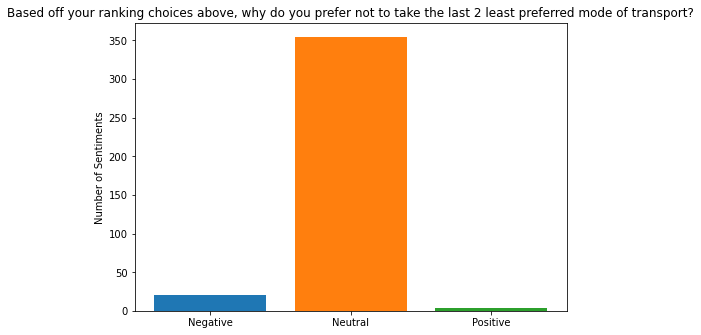

In [6]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment"]=="Positive"]))

In [25]:
len(df[df["Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment"]=="Negative"])

21

In [26]:
df.to_csv("survey labelled with sentiments.csv")

In [53]:
#df = pd.read_csv('survey labelled with sentiments.csv', encoding='utf-8')
df = pd.read_csv('raw_survey_data_380.csv', encoding='utf-8')
df.fillna('', inplace=True)

In [ ]:
#template
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Sentiment of QN")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["x"]=="Negative"]))
ax.bar("Neutral", len(df[df["x"]=="Neutral"]))
ax.bar("Positive", len(df[df["x"]=="Positive"]))

<BarContainer object of 1 artists>

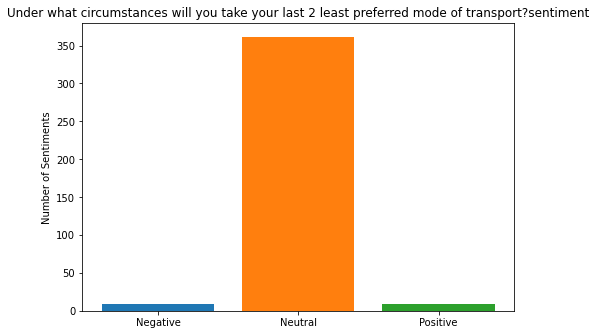

In [4]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Under what circumstances will you take your last 2 least preferred mode of transport?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["Under what circumstances will you take your last 2 least preferred mode of transport?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["Under what circumstances will you take your last 2 least preferred mode of transport?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["Under what circumstances will you take your last 2 least preferred mode of transport?sentiment"]=="Positive"]))

In [5]:
df["Under what circumstances will you take your last 2 least preferred mode of transport?sentiment"].value_counts()

Neutral     362
Positive      9
Negative      9
Name: Under what circumstances will you take your last 2 least preferred mode of transport?sentiment, dtype: int64

<BarContainer object of 1 artists>

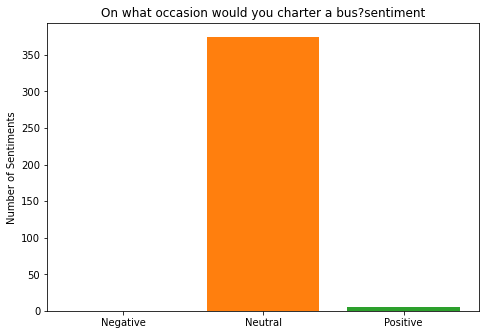

In [6]:
#On what occasion would you charter a bus?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("On what occasion would you charter a bus?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["On what occasion would you charter a bus?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["On what occasion would you charter a bus?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["On what occasion would you charter a bus?sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

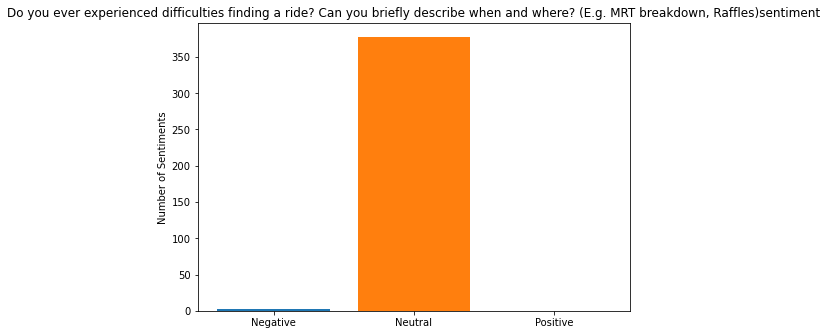

In [7]:
#Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

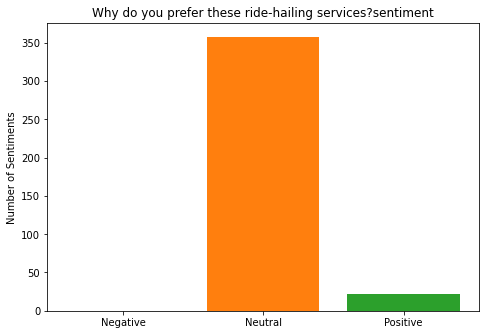

In [8]:
#Why do you prefer these ride-hailing services?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Why do you prefer these ride-hailing services?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["Why do you prefer these ride-hailing services?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["Why do you prefer these ride-hailing services?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["Why do you prefer these ride-hailing services?sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

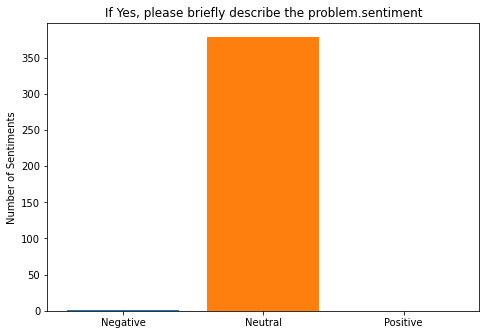

In [9]:
#If Yes, please briefly describe the problem.sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("If Yes, please briefly describe the problem.sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["If Yes, please briefly describe the problem.sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["If Yes, please briefly describe the problem.sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["If Yes, please briefly describe the problem.sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

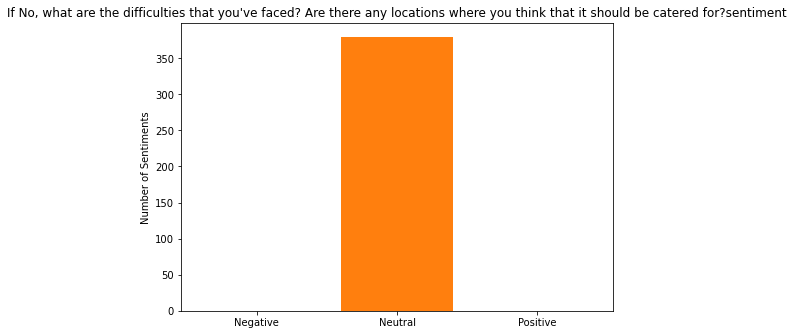

In [10]:
#If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

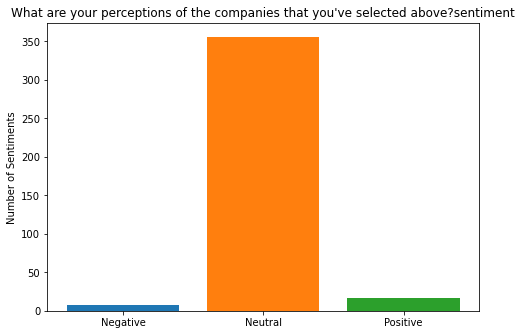

In [11]:
#What are your perceptions of the companies that you've selected above?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("What are your perceptions of the companies that you've selected above?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["What are your perceptions of the companies that you've selected above?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["What are your perceptions of the companies that you've selected above?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["What are your perceptions of the companies that you've selected above?sentiment"]=="Positive"]))

In [47]:
def word_cloud(data, stopword, cat):

    message = data[cat].tolist()

    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    print(f"========================{cat}========================")
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

<BarContainer object of 1 artists>

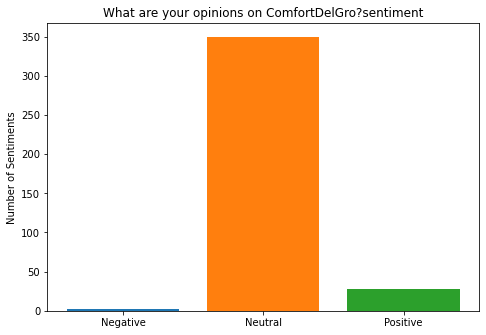

In [13]:
#What are your opinions on ComfortDelGro?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("What are your opinions on ComfortDelGro?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["What are your opinions on ComfortDelGro?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["What are your opinions on ComfortDelGro?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["What are your opinions on ComfortDelGro?sentiment"]=="Positive"]))

<BarContainer object of 1 artists>

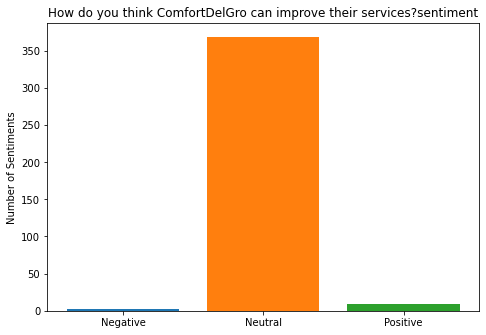

In [14]:
#How do you think ComfortDelGro can improve their services?sentiment
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("How do you think ComfortDelGro can improve their services?sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Negative", len(df[df["How do you think ComfortDelGro can improve their services?sentiment"]=="Negative"]))
ax.bar("Neutral", len(df[df["How do you think ComfortDelGro can improve their services?sentiment"]=="Neutral"]))
ax.bar("Positive", len(df[df["How do you think ComfortDelGro can improve their services?sentiment"]=="Positive"]))

In [15]:
df["How do you think ComfortDelGro can improve their services?sentiment"].value_counts()

Neutral     369
Positive      9
Negative      2
Name: How do you think ComfortDelGro can improve their services?sentiment, dtype: int64

========================Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?========================


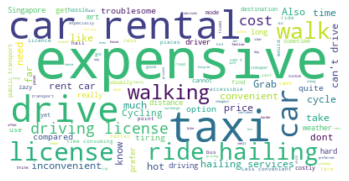

In [54]:
word_cloud(df, stop, "Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?")

========================Under what circumstances will you take your last 2 least preferred mode of transport?========================


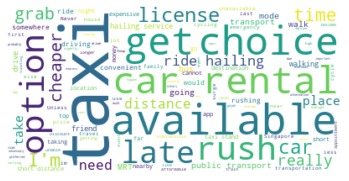

In [55]:
word_cloud(df, stop, "Under what circumstances will you take your last 2 least preferred mode of transport?")

========================On what occasion would you charter a bus?========================


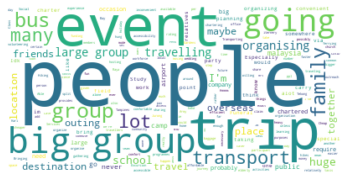

In [56]:
word_cloud(df, stop, "On what occasion would you charter a bus?")

========================Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)========================


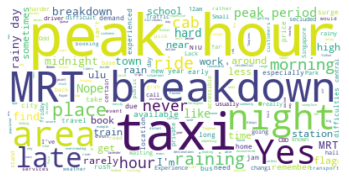

In [57]:
word_cloud(df, stop, "Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)")

========================Why do you prefer these ride-hailing services?========================


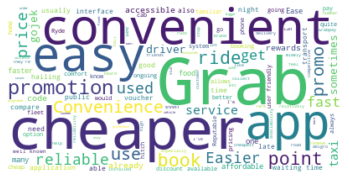

In [58]:
word_cloud(df, stop, "Why do you prefer these ride-hailing services?")

========================Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)========================


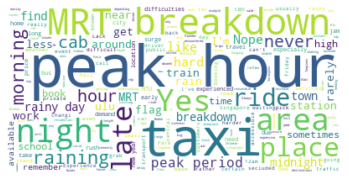

In [59]:
word_cloud(df, stop, "Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)")

========================If Yes, please briefly describe the problem.========================


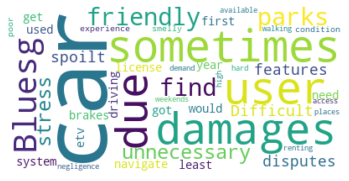

In [16]:
word_cloud(df, stop,"If Yes, please briefly describe the problem.")

========================If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?========================


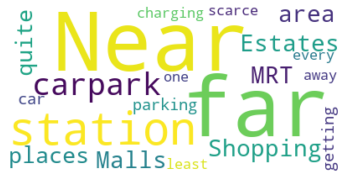

In [29]:
word_cloud(df, stop,"If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?")

========================What are your perceptions of the companies that you've selected above?========================


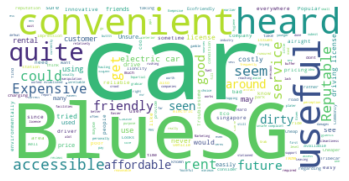

In [12]:
word_cloud(df, stop, "What are your perceptions of the companies that you've selected above?")

========================What are your opinions on ComfortDelGro?========================


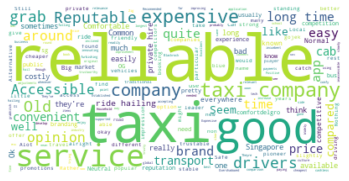

In [60]:
word_cloud(df, stop, "What are your opinions on ComfortDelGro?")

In [ ]:
word_cloud(df, stop, "How do you think ComfortDelGro can improve their services?")

In [20]:
#stopwords to rerun
stop = stopwords.words('english')
newStopWords = ['NA','na','Na','nil','Nil','NIL']
stop.extend(newStopWords)

In [21]:
def wc_pos(data, stopword, col, text_col):
    t = data[data[col]=='Positive']

    message = t[text_col].tolist()
    
    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

In [22]:
def wc_neg(data, stopword, col, text_col):
    t = data[data[col]=='Negative']

    message = t[text_col].tolist()
    
    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

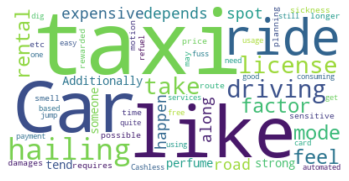

In [23]:
wc_pos(df, stop, 'Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment','Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?')

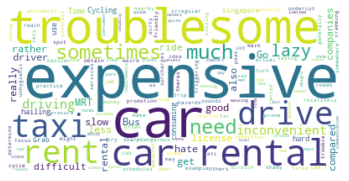

In [24]:
wc_neg(df, stop, 'Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?sentiment','Based off your ranking choices above, why do you prefer not to take the last 2 least preferred mode of transport?')

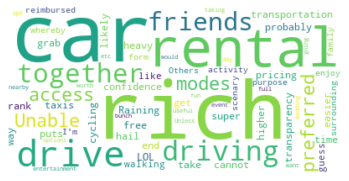

In [25]:
wc_pos(df, stop, 
       'Under what circumstances will you take your last 2 least preferred mode of transport?sentiment',
       'Under what circumstances will you take your last 2 least preferred mode of transport?')

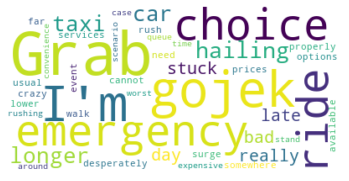

In [27]:
wc_neg(df, stop, 
       'Under what circumstances will you take your last 2 least preferred mode of transport?sentiment',
       'Under what circumstances will you take your last 2 least preferred mode of transport?')

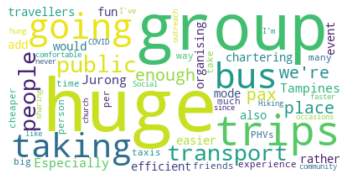

In [28]:
wc_pos(df, stop, 
       'On what occasion would you charter a bus?sentiment',
       'On what occasion would you charter a bus?')

In [29]:
wc_neg(df, stop, 
       'On what occasion would you charter a bus?sentiment',
       'On what occasion would you charter a bus?')

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [30]:
wc_pos(df, stop, 
       'Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment',
       'Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)')

ValueError: We need at least 1 word to plot a word cloud, got 0.

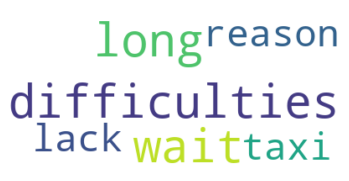

In [31]:
wc_neg(df, stop, 
       'Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)sentiment',
       'Do you ever experienced difficulties finding a ride? Can you briefly describe when and where? (E.g. MRT breakdown, Raffles)')

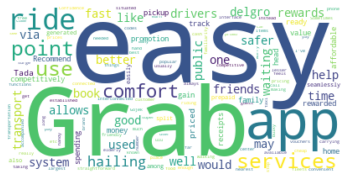

In [32]:
wc_pos(df, stop, 
       'Why do you prefer these ride-hailing services?sentiment',
       'Why do you prefer these ride-hailing services?')

In [33]:
wc_neg(df, stop, 
       'Why do you prefer these ride-hailing services?sentiment',
       'Why do you prefer these ride-hailing services?')

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [34]:
wc_pos(df, stop, 
       'If Yes, please briefly describe the problem.sentiment',
       'If Yes, please briefly describe the problem.')

ValueError: We need at least 1 word to plot a word cloud, got 0.

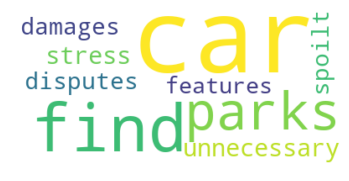

In [35]:
wc_neg(df, stop, 
       'If Yes, please briefly describe the problem.sentiment',
       'If Yes, please briefly describe the problem.')

In [36]:
wc_pos(df, stop, 
       "If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment",
       "If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?")

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [37]:
wc_neg(df, stop, 
       "If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?sentiment",
       "If No, what are the difficulties that you've faced? Are there any locations where you think that it should be catered for?")

ValueError: We need at least 1 word to plot a word cloud, got 0.

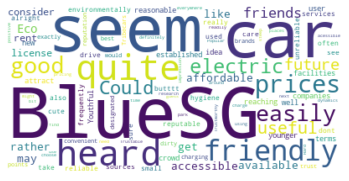

In [38]:
wc_pos(df, stop,
       "What are your perceptions of the companies that you've selected above?sentiment",
       "What are your perceptions of the companies that you've selected above?")

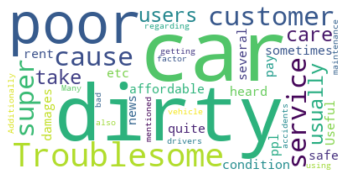

In [39]:
wc_neg(df, stop,
       "What are your perceptions of the companies that you've selected above?sentiment",
       "What are your perceptions of the companies that you've selected above?")

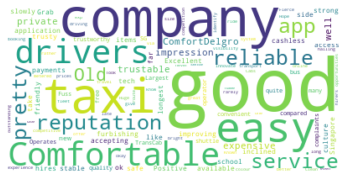

In [40]:
wc_pos(df, stop,
       'What are your opinions on ComfortDelGro?sentiment',
       'What are your opinions on ComfortDelGro?')

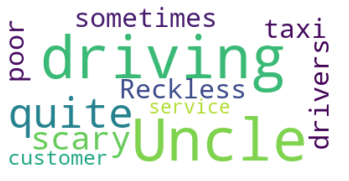

In [41]:
wc_neg(df, stop,
       'What are your opinions on ComfortDelGro?sentiment',
       'What are your opinions on ComfortDelGro?')

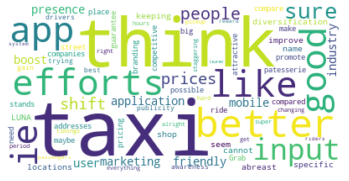

In [42]:
wc_pos(df, stop,
       'How do you think ComfortDelGro can improve their services?sentiment',
       'How do you think ComfortDelGro can improve their services?')

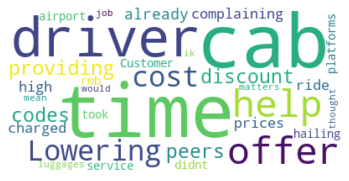

In [43]:
wc_neg(df, stop,
       'How do you think ComfortDelGro can improve their services?sentiment',
       'How do you think ComfortDelGro can improve their services?')